# 01.Decision Tree Classifier - Non Categorical Attributes

# Load and Prepare Data

Let's first load the required `Iris dataset` read CSV function. You can download the data 
[here](https://www.kaggle.com/uciml/iris?select=Iris.csv)

This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

**Content**

The datasets consists of several features of flowers as predictor variables and one target variable, Outcome. Predictor variables includes the number of species 

#### Format of the data
- the last column of the data frame must contain the label and it must also be called **"label"**
- there should be no missing values in the data frame

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

In [2]:
# Loading dataset
df=pd.read_csv('Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


**Note:** There are 150 entries and there are no null values so there are no missing values. 

## Find different classes involved and size of dataset 

In [3]:
# find different species of flowers from Iris 
df['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [4]:
# find size of dataset- number of rows and columns
df.shape

(150, 6)

## `Species` is a Categorical variables and separate it from `df`

In [5]:
#Encoding Categorical variables
species_dumies=pd.get_dummies(df.Species)

In [6]:
species_dumies

,Iris-setosa,Iris-versicolor,Iris-virginica
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
145,0,0,1
146,0,0,1
147,0,0,1
148,0,0,1


In [7]:
# concatenating the encoded columns
# dataframe will give you Species which are present for each tuple
df=pd.concat([df,species_dumies,],axis= 'columns')

In [8]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Iris-setosa,Iris-versicolor,Iris-virginica
0,1,5.1,3.5,1.4,0.2,Iris-setosa,1,0,0
1,2,4.9,3.0,1.4,0.2,Iris-setosa,1,0,0
2,3,4.7,3.2,1.3,0.2,Iris-setosa,1,0,0
3,4,4.6,3.1,1.5,0.2,Iris-setosa,1,0,0
4,5,5.0,3.6,1.4,0.2,Iris-setosa,1,0,0


In [9]:
# drop unnecessary columns like 'Species','Id
df.drop(['Species','Id'],axis='columns',inplace=True)

In [10]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Iris-setosa,Iris-versicolor,Iris-virginica
0,5.1,3.5,1.4,0.2,1,0,0
1,4.9,3.0,1.4,0.2,1,0,0
2,4.7,3.2,1.3,0.2,1,0,0
3,4.6,3.1,1.5,0.2,1,0,0
4,5.0,3.6,1.4,0.2,1,0,0


In [11]:
# Extracting dependent and independent variables and store in array
#iloc() gives specific colums or rows
# iloc[:,0:4] gives all rows but 0 to 4 columns i.e. till 0,1,2,3 columns 
# iloc[:,4:7] gives all rows but 4 to 7 columns i.e. till 4,5,6 columns

x=df.iloc[:,0:4].values
y=df.iloc[:,4:].values

In [12]:
# Splitting dataset into training and test data set
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x, y, test_size=0.20, random_state=0) # 80% training and 20% test

### Building Decision Tree Model

Let's create a Decision Tree Model using Scikit-learn.

`DecisionTreeClassifier` is a class capable of performing multi-class classification on a dataset.

`DecisionTreeClassifier` takes as input two arrays: 

- array X, sparse or dense, of `shape(n_samples, n_features)` holding the training samples, 
- array Y of integer values, `shape(n_samples,)`, holding the class labels for the training samples

In [13]:
# fitting Decision tree classifier to the traing set
from sklearn.tree import DecisionTreeClassifier
classifier=DecisionTreeClassifier(criterion='entropy',random_state=0)
classifier.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

## Predicting test set results

In [14]:
# predicting test set results
y_predict=classifier.predict(x_test)

In [15]:
classifier.predict([[4.6,3.1,1.5,0.2]])
# gives flower Iris-setosa

array([[1, 0, 0]], dtype=uint8)

In [16]:
classifier.predict([[5.9,3.0,5.1,1.8]])
# gives flower Iris-virginica

array([[0, 0, 1]], dtype=uint8)

### Evaluating Model

Let's estimate, how accurately the classifier or model can predict the type of cultivars.

Accuracy can be computed by comparing actual test set values and predicted values.

In [17]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",classifier.score(x_test,y_test))

Accuracy: 1.0


## Visualisation

In [18]:
# Text Representation
from sklearn import tree
text_representation=tree.export_text(classifier)
print(text_representation)

|--- feature_3 <= 0.80
|   |--- class: 1
|--- feature_3 >  0.80
|   |--- feature_3 <= 1.75
|   |   |--- feature_2 <= 4.95
|   |   |   |--- feature_3 <= 1.65
|   |   |   |   |--- class: 0
|   |   |   |--- feature_3 >  1.65
|   |   |   |   |--- class: 0
|   |   |--- feature_2 >  4.95
|   |   |   |--- feature_3 <= 1.55
|   |   |   |   |--- class: 0
|   |   |   |--- feature_3 >  1.55
|   |   |   |   |--- feature_2 <= 5.45
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_2 >  5.45
|   |   |   |   |   |--- class: 0
|   |--- feature_3 >  1.75
|   |   |--- feature_2 <= 4.85
|   |   |   |--- feature_1 <= 3.10
|   |   |   |   |--- class: 0
|   |   |   |--- feature_1 >  3.10
|   |   |   |   |--- class: 0
|   |   |--- feature_2 >  4.85
|   |   |   |--- class: 0



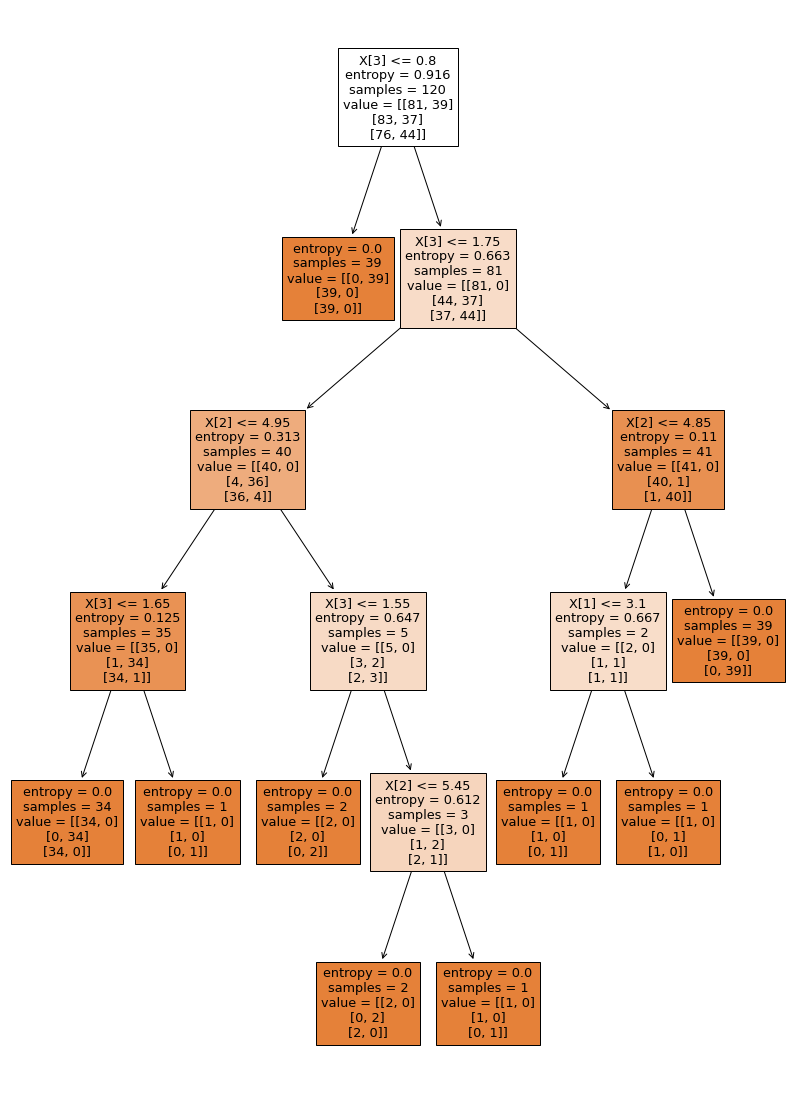

In [19]:
# plotting Tree with plot_tree
fig=plt.figure(figsize=(14,20))
tree.plot_tree(classifier,filled=True);